In [1]:
import pandas as pd
# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Result
0,41.00000,190.000000,7.4,67,5,1,0
1,36.00000,118.000000,8.0,72,5,2,0
2,12.00000,149.000000,12.6,74,5,3,0
3,18.00000,313.000000,11.5,62,5,4,0
4,42.12931,185.931507,14.3,56,5,5,1


In [2]:

train_cols=df.columns[1:-3]
X = df[train_cols]
y = df['Result']


In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)


In [4]:
X = X_samp[train_cols]
y = y_samp['Result']

c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-

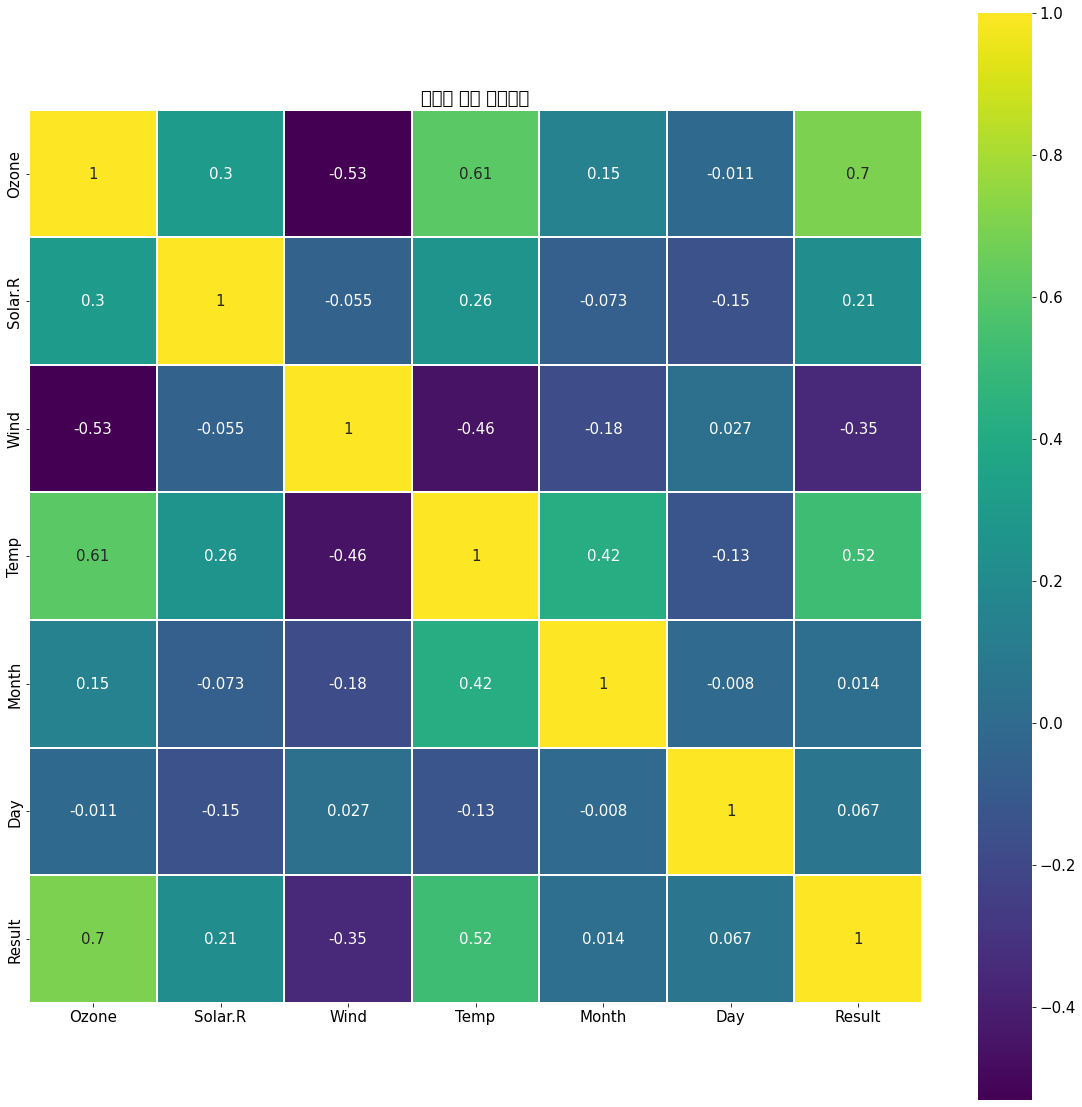

In [5]:
import matplotlib.pylab as plt
import seaborn as sns
#상관계수 행렬 그래프
plt.figure(figsize=(20, 20))
plt.rc('font', size=15)
sns.heatmap(df.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('변수들 간의 상관관계')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
#데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
# 3. 모델 구성
model = Sequential()
# 노드개수, 독립변수 개수, 활성화함수 relu
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
# sigmoid : 0.0~1.0
model.add(Dense(1, activation='sigmoid'))
# 4. 모델 학습과정 설정
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # 평균0, 표준편차1로 만드는 스케일러
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
# 5. 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 1s 7ms/step - loss: 0.2482 - accuracy: 0.5391
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2260 - accuracy: 0.8087
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2085 - accuracy: 0.7739
Epoch 4/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1944 - accuracy: 0.7826
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1805 - accuracy: 0.7652
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1691 - accuracy: 0.7652
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1625 - accuracy: 0.7739
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1572 - accuracy: 0.7739
Epoch 9/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1544 - accuracy: 0.7739
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1518 - accuracy: 0.7826
Epoch 11/1000
4/4 [

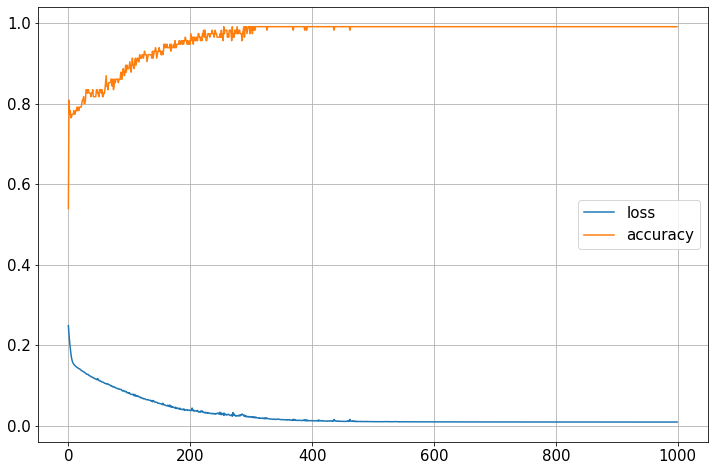

In [10]:
# 6. 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 학습용 데이터셋의 손실률
plt.plot(hist.history['accuracy']) # 학습용 데이터셋의 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [11]:
# 7. 모델 평가
scores = model.evaluate(X_train_scaled, y_train)
print(scores) #학습용
scores = model.evaluate(X_test_scaled, y_test)
print(scores) #검증용

4/4 [==============================] - 0s 5ms/step - loss: 0.0088 - accuracy: 0.9913
[0.008757567033171654, 0.991304337978363]
1/1 [==============================] - 0s 26ms/step - loss: 0.1952 - accuracy: 0.7586
[0.1951705366373062, 0.7586206793785095]


In [14]:
import numpy as np
# 새로운 값 예측
# 일조량 25, 풍량 10.8, 화씨온도 71도일 때의 오존량
test_set = np.array([25, 10.8, 71]).reshape(1,3)
test_set=scaler.transform(test_set)
print(model.predict(test_set)) # 1일 확률 0%
# 일조량 255, 풍량 4.3, 화씨온도 90도일 때의 오존량
test_set = np.array([255, 4.3, 90]).reshape(1,3)
test_set=scaler.transform(test_set)
print(model.predict(test_set)) # 1일 확률 98.5%

1/1 [==============================] - 0s 20ms/step
[[6.055471e-08]]
1/1 [==============================] - 0s 26ms/step
[[1.]]


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


: 

In [ ]:
model.save('c:/data/ozone')
model.save_weights('c:/data/ozone/ozone.weight')

INFO:tensorflow:Assets written to: c:/data/ozone\assets


In [ ]:
import joblib 
joblib.dump(scaler, 'c:/data/ozone/scaler.model')

['c:/data/ozone/scaler.model']